In [19]:
import torch
from  torch import nn 

In [7]:
bias=0.4
weight=.9

X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=weight*X+bias

In [6]:
y, X

(tensor([[-0.4000],
         [-0.3820],
         [-0.3640],
         [-0.3460],
         [-0.3280],
         [-0.3100],
         [-0.2920],
         [-0.2740],
         [-0.2560],
         [-0.2380],
         [-0.2200],
         [-0.2020],
         [-0.1840],
         [-0.1660],
         [-0.1480],
         [-0.1300],
         [-0.1120],
         [-0.0940],
         [-0.0760],
         [-0.0580],
         [-0.0400],
         [-0.0220],
         [-0.0040],
         [ 0.0140],
         [ 0.0320],
         [ 0.0500],
         [ 0.0680],
         [ 0.0860],
         [ 0.1040],
         [ 0.1220],
         [ 0.1400],
         [ 0.1580],
         [ 0.1760],
         [ 0.1940],
         [ 0.2120],
         [ 0.2300],
         [ 0.2480],
         [ 0.2660],
         [ 0.2840],
         [ 0.3020],
         [ 0.3200],
         [ 0.3380],
         [ 0.3560],
         [ 0.3740],
         [ 0.3920],
         [ 0.4100],
         [ 0.4280],
         [ 0.4460],
         [ 0.4640],
         [ 0.4820]])

In [8]:
train_split=int(.8*len(X))
train_split

40

In [9]:
X_train, y_train=X[:train_split], X[:train_split]
X_test,y_test=X[train_split:], X[train_split:]

In [10]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [31]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias=nn.parameter.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    
    
    def forward(self,x)->torch.Tensor:
        return self.weight*x+self.bias

In [32]:
torch.manual_seed(42)
model_0=LinearModel()

In [33]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [34]:
with torch.inference_mode():
    y_pred=model_0(X_test)

In [37]:
y_pred,X_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]))

In [55]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.001)

In [56]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 150

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.0034436702262610197 | MAE Test Loss: 0.004985594656318426 
Epoch: 10 | MAE Train Loss: 0.0006549620302394032 | MAE Test Loss: 0.00143230555113405 
Epoch: 20 | MAE Train Loss: 0.0003116043226327747 | MAE Test Loss: 0.0006736218929290771 
Epoch: 30 | MAE Train Loss: 0.00044524535769596696 | MAE Test Loss: 0.0011127472389489412 
Epoch: 40 | MAE Train Loss: 0.00044524535769596696 | MAE Test Loss: 0.0011127472389489412 
Epoch: 50 | MAE Train Loss: 0.00044524535769596696 | MAE Test Loss: 0.0011127472389489412 
Epoch: 60 | MAE Train Loss: 0.00044524535769596696 | MAE Test Loss: 0.0011127472389489412 
Epoch: 70 | MAE Train Loss: 0.00044524535769596696 | MAE Test Loss: 0.0011127472389489412 
Epoch: 80 | MAE Train Loss: 0.00044524535769596696 | MAE Test Loss: 0.0011127472389489412 
Epoch: 90 | MAE Train Loss: 0.00044524535769596696 | MAE Test Loss: 0.0011127472389489412 
Epoch: 100 | MAE Train Loss: 0.00044524535769596696 | MAE Test Loss: 0.0011127472389489412 
Epoch

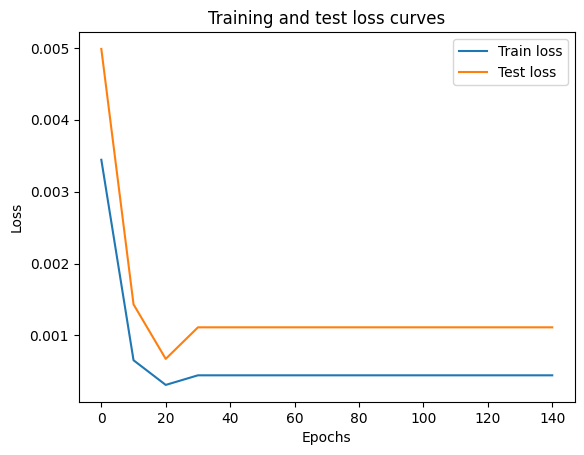

In [57]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [58]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weight', tensor([0.9996])), ('bias', tensor([0.0006]))])

And the original values for weights and bias are:
weights: 0.9, bias: 0.4


In [59]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds,

(tensor([[0.8003],
         [0.8203],
         [0.8403],
         [0.8602],
         [0.8802],
         [0.9002],
         [0.9202],
         [0.9402],
         [0.9602],
         [0.9802]]),)

In [48]:
y_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])